In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
mkoklu42/acoustic-extinguisher-fire-dataset                      Acoustic Extinguisher Fire Dataset                 620KB  2022-02-09 17:59:52            228  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17             58  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            175  
mkoklu42/rice-image-dataset                                      Rice Image Dataset                                 222MB  2022-02-07 14:32:24            233  
mkoklu42/pumpkin-seeds-dataset          

In [5]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! mkdir climate_change_earth_surface_temp

mkdir: cannot create directory ‘climate_change_earth_surface_temp’: File exists


In [7]:
! unzip climate-change-earth-surface-temperature-data -d climate_change_earth_surface_temp

Archive:  climate-change-earth-surface-temperature-data.zip
replace climate_change_earth_surface_temp/GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [9]:
df = pd.read_csv('/content/climate_change_earth_surface_temp/GlobalLandTemperaturesByCity.csv')

In [10]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [11]:
df.shape

(8599212, 7)

In [12]:
df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [13]:
(df==0).sum()

dt                                0
AverageTemperature               75
AverageTemperatureUncertainty     0
City                              0
Country                           0
Latitude                          0
Longitude                         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [15]:
df = df[df['Country'] == 'Denmark']

In [16]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [17]:
df.shape

(12956, 7)

In [18]:
df.isna().sum()

dt                                 0
AverageTemperature               292
AverageTemperatureUncertainty    292
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [19]:
(df==0).sum()

dt                               0
AverageTemperature               2
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [20]:
df_c = df.replace({'AverageTemperature':0},np.nan) #replace 0 value with nan

In [21]:
(df_c==0).sum()


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [22]:
df_c.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [23]:
df_c['Country'].value_counts()

Denmark    12956
Name: Country, dtype: int64

In [24]:
df_c.isna().sum()

dt                                 0
AverageTemperature               294
AverageTemperatureUncertainty    292
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [25]:
df_c

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
5412619,2013-05-01,12.774,0.426,Odense,Denmark,55.45N,11.34E
5412620,2013-06-01,15.685,0.370,Odense,Denmark,55.45N,11.34E
5412621,2013-07-01,18.735,0.441,Odense,Denmark,55.45N,11.34E
5412622,2013-08-01,18.067,0.239,Odense,Denmark,55.45N,11.34E


In [26]:
df_c.dropna(inplace=True) #for simplificity, we drop NA

In [27]:
df_c.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [28]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 5412622
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             12662 non-null  object 
 1   AverageTemperature             12662 non-null  float64
 2   AverageTemperatureUncertainty  12662 non-null  float64
 3   City                           12662 non-null  object 
 4   Country                        12662 non-null  object 
 5   Latitude                       12662 non-null  object 
 6   Longitude                      12662 non-null  object 
dtypes: float64(2), object(5)
memory usage: 791.4+ KB


In [29]:
df_c['dt'] = pd.to_datetime(df_c['dt']) #convert dt to datetime

In [30]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 5412622
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             12662 non-null  datetime64[ns]
 1   AverageTemperature             12662 non-null  float64       
 2   AverageTemperatureUncertainty  12662 non-null  float64       
 3   City                           12662 non-null  object        
 4   Country                        12662 non-null  object        
 5   Latitude                       12662 non-null  object        
 6   Longitude                      12662 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 791.4+ KB


In [31]:
df_c.index = df_c['dt']

In [32]:
df_c = df_c.drop('dt', axis=1)

In [33]:
df_c.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [39]:
ts = df_c['AverageTemperature'] #we want to make time analysis respect to Avg Temperature

In [40]:
ts.head()

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
Name: AverageTemperature, dtype: float64

In [41]:
ts.describe()

count    12662.000000
mean         7.803872
std          6.648090
min         -7.816000
25%          2.085000
50%          7.203000
75%         14.191500
max         21.437000
Name: AverageTemperature, dtype: float64

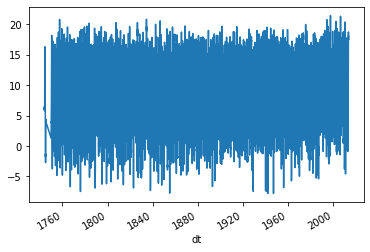

In [42]:
ts.plot()

In [43]:
ts.index.min()

Timestamp('1743-11-01 00:00:00')

In [44]:
ts.index.max()

Timestamp('2013-08-01 00:00:00')

In [46]:
#perform Augmented-Dickey Fuller test:
#ADF test: null hypotesis -- non-stationaty if p-value <5% reject null hypotesis

In [49]:
adfuller_test = adfuller(ts,autolag='AIC')

In [55]:
adfuller_test[0] #ADF Statistic

-14.748787261337661

In [56]:
adfuller_test[1] #p-value | p-value <5%, thus it is stationary

2.5038495036158753e-27

In [54]:
adfuller_test

(-14.748787261337661,
 2.5038495036158753e-27,
 41,
 12620,
 {'1%': -3.430868275008691,
  '10%': -2.5668919193806023,
  '5%': -2.8617690519612213},
 49835.69460884803)

In [59]:
arma = ARMA(ts,order=(1,1))
results = arma.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [60]:
predictions = results.predict('01/01/1990','01/01/1991')

In [62]:
predictions.shape

(13,)

In [64]:
actuals = ts['01/01/1990':'01/01/1991'][0:13]

In [67]:
actuals.shape

(13,)

In [68]:
from sklearn.metrics import mean_absolute_error

In [70]:
mae = mean_absolute_error(actuals,predictions)
mae

1.812888442830077

In [89]:
comb = pd.concat([actuals, predictions], axis=1)
comb

,AverageTemperature,0
dt,,
1990-01-01,4.267,2.887430
1990-02-01,5.895,5.788532
1990-03-01,6.565,6.421545
1990-04-01,8.068,6.941294
1990-05-01,12.944,8.523302
1990-06-01,15.672,13.703751
1990-07-01,16.844,14.616984
1990-08-01,17.402,15.615845
1990-09-01,12.446,15.830730


In [96]:
comb.columns

Index(['AverageTemperature', 0], dtype='object')

In [98]:
comb = comb.rename(columns={'AverageTemperature': 'actual', 0: 'prediction'})
comb

,actual,prediction
dt,,
1990-01-01,4.267,2.887430
1990-02-01,5.895,5.788532
1990-03-01,6.565,6.421545
1990-04-01,8.068,6.941294
1990-05-01,12.944,8.523302
1990-06-01,15.672,13.703751
1990-07-01,16.844,14.616984
1990-08-01,17.402,15.615845
1990-09-01,12.446,15.830730


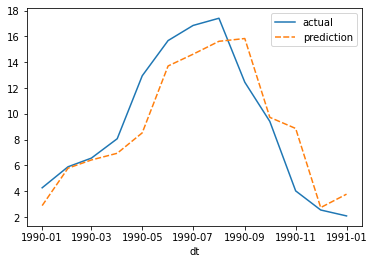

In [99]:
sns.lineplot(data=comb)

In [91]:
#Note: it can be further improve using hyper-parameter on ARMA